In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn import set_config

set_config(display="diagram")

In [2]:
df = pd.read_csv(r'C:\Users\viksaraw\OneDrive\Berkeley\Module 11\practical_application_II_starter\data\vehicles.csv')

In [3]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
df.shape

(426880, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [6]:
#null count per column
null_count = df.isnull().sum()
null_count

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [7]:
# There are many columns with NaN values, Nan count per column
na_count = df.isna().sum()
na_count

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [8]:
# percentage of Nan values in each column
na_percentage = (df.isna().sum() / len(df)) * 100
na_percentage

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

In [9]:
df['manufacturer'].unique()
# manufacturer has Nan values, no other issues

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [10]:
df['condition'].unique()
# has Nan values, no other issue

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [11]:
df['cylinders'].unique()
# Issues
# 1. has Nan values
# 2. has value as 'other'
# 3. The type of the column is object but it needs to be converted to number, I will do this after Train Test Split

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [12]:
df['transmission'].unique()

array([nan, 'other', 'automatic', 'manual'], dtype=object)

In [13]:
df['drive'].unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [14]:
# Checking duplicate values in the dataset

df[df.duplicated()]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state


In [15]:
# Checking duplicate records, Find duplicate records in id
duplicates_Id = df[df.duplicated(subset=['id'], keep = False)]
duplicates_Id
# No duplicate in id

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state


In [16]:
# Checking duplicate records, Find duplicate records in VIN
duplicate_vins = df[df['VIN'].notna() & df.duplicated(subset=['VIN'], keep=False)]
duplicate_vins
# There are 18872 records which have duplicate VIN. But eyeballing few records with same VIN, the price has changed with change in year and region
# Meaning, the same car has different price value in different year, which is correct. So ignoring repetition of VIN

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
32,7316343444,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,1GT220CG8CZ231238,4wd,NaN,pickup,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [17]:
# Find records with duplicate id
duplicate_id = df[df['id'].notna() & df.duplicated(subset=['id'], keep=False)]
duplicate_id
# No duplicate in id

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state


In [18]:
# Checking on Price
price_list = df[df['price']<100]
price_list
# Looking at the records there are 36222 records where price is =less than 100
# Since this is a small number these records can be deleted

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
10,7218893038,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
11,7218325704,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
12,7217788283,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
13,7217147606,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
14,7209027818,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426764,7303347225,wyoming,0,2018.0,NaN,peterbilt 579,NaN,NaN,diesel,1.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy
426812,7302877815,wyoming,0,2006.0,toyota,scion tc,excellent,4 cylinders,gas,195000.0,clean,automatic,JTKDE177460109655,fwd,NaN,NaN,silver,wy
426832,7302353283,wyoming,0,2004.0,toyota,prius,excellent,4 cylinders,hybrid,239000.0,clean,automatic,JTDKB20U840108051,fwd,NaN,NaN,blue,wy
426836,7302301268,wyoming,0,2018.0,ram,2500,excellent,6 cylinders,diesel,20492.0,clean,automatic,3C6UR5HL3JG307217,4wd,full-size,truck,white,wy


In [19]:
# Checking on Price
price_zero = df[df['price']== 0]
price_zero
# Looking at the records there are 31817 records where price is = 0 which is incorrect.  I will impute the price after Train Test Split

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
10,7218893038,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
11,7218325704,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
12,7217788283,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
13,7217147606,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
14,7209027818,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426764,7303347225,wyoming,0,2018.0,NaN,peterbilt 579,NaN,NaN,diesel,1.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy
426812,7302877815,wyoming,0,2006.0,toyota,scion tc,excellent,4 cylinders,gas,195000.0,clean,automatic,JTKDE177460109655,fwd,NaN,NaN,silver,wy
426832,7302353283,wyoming,0,2004.0,toyota,prius,excellent,4 cylinders,hybrid,239000.0,clean,automatic,JTDKB20U840108051,fwd,NaN,NaN,blue,wy
426836,7302301268,wyoming,0,2018.0,ram,2500,excellent,6 cylinders,diesel,20492.0,clean,automatic,3C6UR5HL3JG307217,4wd,full-size,truck,white,wy


In [20]:
# Checking on Price less than 1000 but not 0
price_below_grand = df[(df['price']<1000) & (df['price']!=0)]
price_below_grand
# Looking at the records there are 31817 records where price is = 0 which is incorrect.  Records where price is less than 1000 will be imputed based
# upon the median of the same model in the same year

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
26,7219973522,la crosse,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wi
96,7309361405,auburn,80,2004.0,honda,NaN,excellent,6 cylinders,gas,94020.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,al
255,7316156727,birmingham,500,2021.0,NaN,SPECIAL FINANCE PROGRAM 2020,fair,other,other,1400.0,clean,other,NaN,NaN,full-size,bus,green,al
345,7315262722,birmingham,500,2021.0,NaN,SPECIAL FINANCE PROGRAM 2020,fair,other,other,1400.0,clean,other,NaN,NaN,full-size,bus,green,al
369,7314941829,birmingham,199,2017.0,dodge,charger,NaN,NaN,gas,21737.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426262,7301869705,wausau,800,1999.0,ram,1500,fair,8 cylinders,gas,137000.0,clean,automatic,NaN,4wd,full-size,pickup,purple,wi
426342,7315020760,wyoming,600,2002.0,saturn,sl2,good,4 cylinders,gas,150000.0,clean,automatic,NaN,fwd,compact,sedan,red,wy
426357,7314353850,wyoming,500,2000.0,dodge,grand caravan,NaN,6 cylinders,gas,187000.0,clean,automatic,NaN,fwd,NaN,NaN,red,wy
426664,7306611738,wyoming,950,1995.0,ford,f-150,NaN,8 cylinders,gas,209452.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,wy


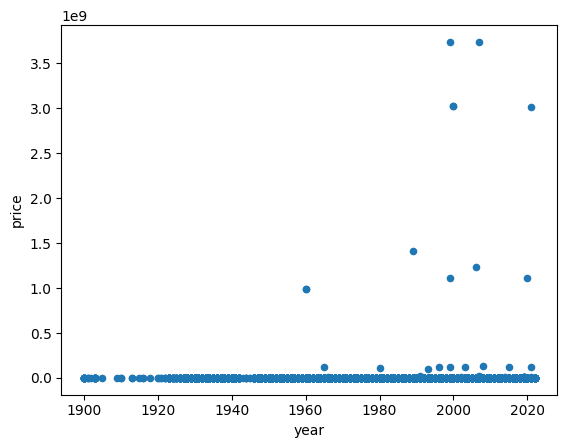

In [21]:
# Outlier analysis using scatter plot for price against year
df[["year", "price"]].plot(kind = "scatter", x = "year", y = "price");
#There are very few outliers, so this outlier can be ignored

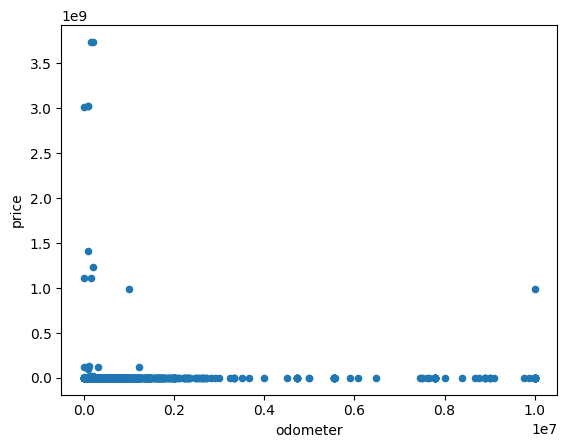

In [22]:
# Odometer vs price scatter plot
df[["odometer", "price"]].plot(kind = "scatter", x = "odometer", y = "price");
#There are very few outliers, so this outlier can be ignored

(array([1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(1880.0, 0, '1880'),
  Text(1900.0, 0, '1900'),
  Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020'),
  Text(2040.0, 0, '2040')])

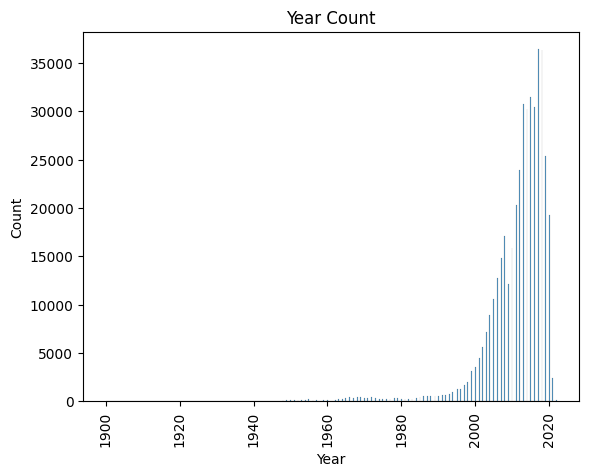

In [23]:
# Check histogram for each count for each year
sns.histplot(df, x='year')
plt.title("Year Count")
plt.xlabel("Year")
plt.xticks(rotation=90)
# Clearly the graph is left skewed. We have substantial data after 2000
# Analysis- We can ignore the data before 2000

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'gmc'),
  Text(1, 0, 'chevrolet'),
  Text(2, 0, 'toyota'),
  Text(3, 0, 'ford'),
  Text(4, 0, 'jeep'),
  Text(5, 0, 'nissan'),
  Text(6, 0, 'ram'),
  Text(7, 0, 'mazda'),
  Text(8, 0, 'cadillac'),
  Text(9, 0, 'honda'),
  Text(10, 0, 'dodge'),
  Text(11, 0, 'lexus'),
  Text(12, 0, 'jaguar'),
  Text(13, 0, 'buick'),
  Text(14, 0, 'chrysler'),
  Text(15, 0, 'volvo'),
  Text(16, 0, 'audi'),
  Text(17, 0, 'infiniti'),
  Text(18, 0, 'lincoln'),
  Text(19, 0, 'alfa-romeo'),
  Text(20, 0, 'subaru'),
  Text(21, 0, 'acura'),
  Text(22, 0, 'hyundai'),
  Text(23, 0, 'mercedes-benz'),
  Text(24, 0, 'bmw'),
  Text(25, 0, 'mitsubishi'),
  Text(26, 0, 'volkswagen'),
  Text(27, 0, 'porsche'),
  Text(28, 0, 'kia'),
  Text(29, 0, 'rover'),
  Text(30, 0

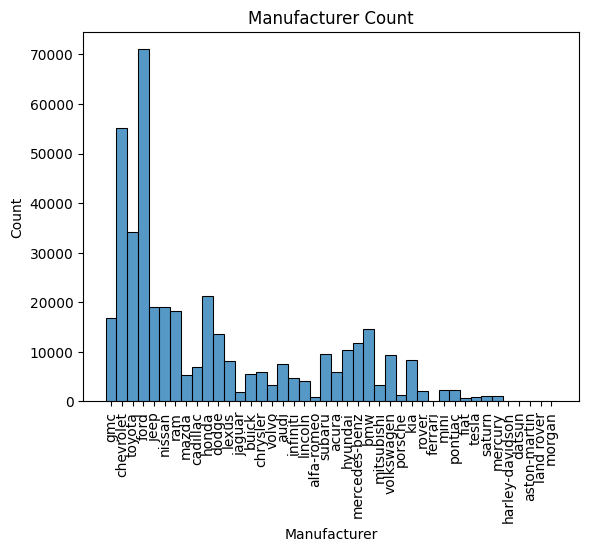

In [24]:
# Check histogram for each model, manufacturer
sns.histplot(df, x='manufacturer')
plt.title("Manufacturer Count")
plt.xlabel("Manufacturer")
plt.xticks(rotation=90)
# Clearly the count for Ford and Toyota is very high and the data is right skewed

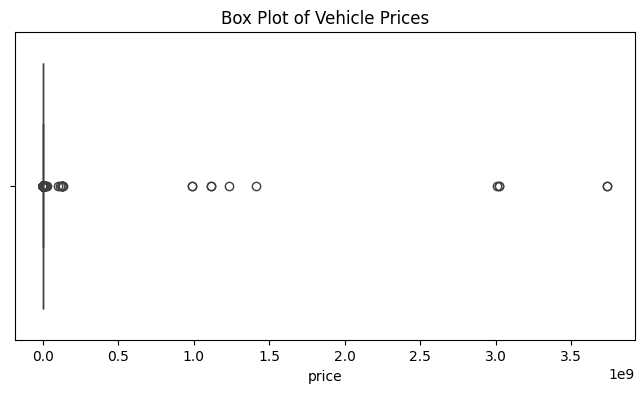

In [25]:
# Boxplot to check outliers in price to analyze outlier
plt.figure(figsize=(8,4))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Vehicle Prices')
plt.show()
# There are  few outliers, can be removed

In [26]:
def remove_outliers(df, column):
   
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [27]:
df = remove_outliers(df,'price')
df.shape

(418703, 18)

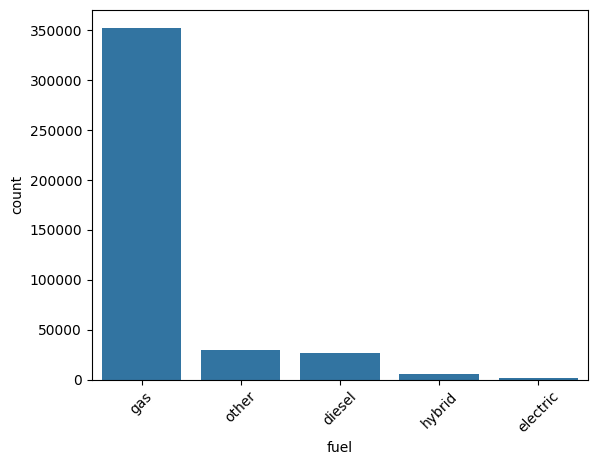

In [28]:
sns.countplot(x=df['fuel'])
plt.xticks(rotation=45)
plt.show()

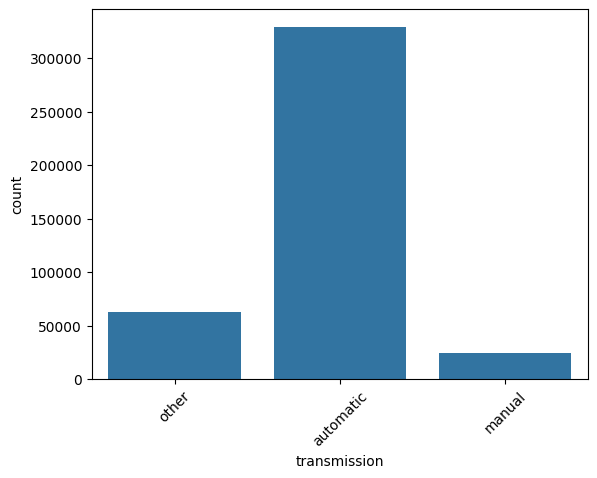

In [29]:
sns.countplot(x=df['transmission'])
plt.xticks(rotation=45)
plt.show()

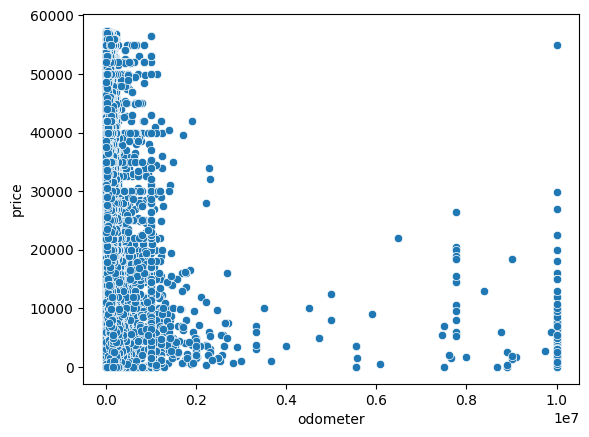

In [30]:
# Scatter plot: Price vs. Odometer

sns.scatterplot(x='odometer', y='price', data=df)
plt.show()
# very few outliers, can be ignored

<Axes: >

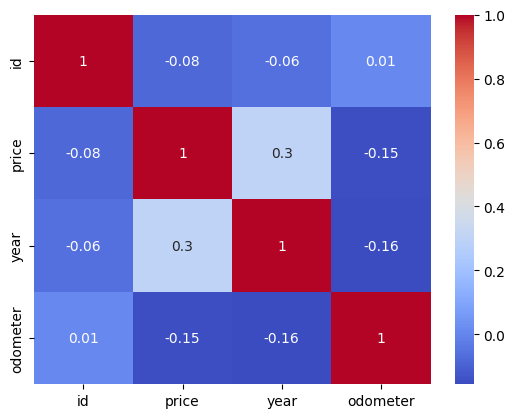

In [31]:
# We will look at the correlation of numerical features

correlation = df.corr(numeric_only = True)
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

In [32]:
From the correlation plot, it is clear  that price is positively correlated with year and negatively correlated with odometer.

SyntaxError: invalid syntax (1579489200.py, line 1)

In [ ]:
df.head(5)

In [ ]:
# Data Preperation

In [ ]:
# Delete where year is Nan. Only .21% of records has year blank, that shouldn't impact our analysis, so I am droping them

df= df.dropna(subset=['year'])

In [ ]:
# year, model, fuel, odometer, title_status, transmission have less than 1.5 % NaN values, so instead of imputing them it is better we drop them
df= df.dropna(subset=['year'])
df= df.dropna(subset=['model'])
df= df.dropna(subset=['fuel'])
df= df.dropna(subset=['odometer'])
df= df.dropna(subset=['title_status'])
df= df.dropna(subset=['transmission'])

In [ ]:
# In the data set there are few rows which has 'NaN' values, removing them
df = df[~df.isin(['Nan']).any(axis=1)]

In [ ]:
# In the data set there are few rows which has 'NaN' values, removing them
df = df[~df.isin(['nan']).any(axis=1)]

In [ ]:
#df = df.drop(df[df['condition'] == 'NaN'].index)
#df = df.drop(df[df['manufacturer'] == 'NaN'].index)
#df = df.drop(df[df['drive'] == 'NaN'].index)
#df = df.drop(df[df['type'] == 'NaN'].index)
#df = df.drop(df[df['VIN'] == 'NaN'].index)
#df = df.drop(df[df['odometer'] == 'NaN'].index)
#df = df.drop(df[df['title_status'] == 'NaN'].index)
#df = df.drop(df[df['transmission'] == 'NaN'].index)
#df = df.drop(df[df['paint_color'] == 'NaN'].index)
#df = df.drop(df[df['cylinders'] == 'NaN'].index)

In [ ]:
# df = df.drop(df[df['cylinders'] == 'other'].index)


In [ ]:
# Since we already have model we don't need manufacturer also, so dropping manufacturer
df = df.drop([ 'manufacturer'], axis=1)

In [ ]:
# Since we already have region we don't need state also, so dropping state
df = df.drop([ 'state'], axis=1)

In [ ]:
# dropping paint color as it doesn't impact price of a car
df = df.drop([ 'paint_color'], axis=1)

In [ ]:
# Since we already have model we don't need manufacturer also, so dropping manufacturer
df = df.drop([ 'VIN'], axis=1)

In [ ]:
# Since we already have model we don't need manufacturer also, so dropping manufacturer
df = df.drop(['id'], axis=1)

In [ ]:
df.head(5)

In [ ]:
na_count = df.isna().sum()
na_count

In [ ]:
hardcoded_nans = ['nan', 'NaN', 'NAN', 'n/a', 'NA', '']

# Function to compute percentage of hardcoded NaNs
def hardcoded_nan_percentage(df, nan_values):
    return df.apply(lambda col: col.astype(str).isin(nan_values).mean() * 100)

# Apply to your DataFrame
hardcoded_nan_percent = hardcoded_nan_percentage(df, hardcoded_nans)

# Optional: Show only columns with any hardcoded NaNs
hardcoded_nan_percent = hardcoded_nan_percent[hardcoded_nan_percent > 0].sort_values(ascending=False)
print(hardcoded_nan_percent)

In [ ]:
# Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis = 1), 
                                                    df['price'], test_size = 0.20,
                                                   random_state=42)

In [ ]:
X_train.shape

In [ ]:
X_train.head(5)

In [ ]:
y_train.head(5)

In [ ]:
#y_train=pd.DataFrame(y_train)
#y_test= pd.DataFrame(y_test)

In [ ]:
# Impute cylinders, drive, size, condition, type based upon the model or a group of model and year

X_train['cylinders'] = X_train.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
X_test['cylinders']  = X_test.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

X_train['drive'] = X_train.groupby('model')['drive'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
X_test['drive']  = X_test.groupby('model')['drive'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))  

X_train['type'] = X_train.groupby('model')['type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
X_test['type']  = X_test.groupby('model')['type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))  

X_train['size'] = X_train.groupby(['model','year'])['size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
X_test['size']  = X_test.groupby(['model', 'year'])['size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
                                                        
X_train['condition'] = X_train.groupby(['model','year'])['condition'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
X_test['condition']  = X_test.groupby(['model','year'])['condition'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
    

In [ ]:
X_train['cylinders'].unique()

# Checking on the unique values for each column, I found that cylinders has non numeric value and 
# data type is also object. It is important to change the values to number and convert the data type to Int

In [ ]:
X_train['drive'].unique()

In [ ]:
X_train['condition'].unique()

In [ ]:
X_train['type'].unique()

In [ ]:
X_train['size'].unique()

In [ ]:
X_train['transmission'].unique()

In [ ]:
X_train['fuel'].unique()

In [ ]:
X_train['title_status'].unique()

In [ ]:
# Set Other and Unknown to 6 cylinders to give a median value

X_train['cylinders'] = X_train['cylinders'].replace({'Unknown': '6 cylinders', 'other': '6 cylinders'})
X_test['cylinders'] = X_test['cylinders'].replace({'Unknown': '6 cylinders', 'other': '6 cylinders'})

In [ ]:
# removing the word cylinders from the cylinders colum

X_train['cylinders'] = X_train['cylinders'].str.extract(r'(\d+)')
X_test['cylinders'] = X_test['cylinders'].str.extract(r'(\d+)')

In [ ]:
# Code to convert type of cylinders column to int

X_train['cylinders'] = X_train['cylinders'].astype(int)
X_test['cylinders'] = X_test['cylinders'].astype(int)

In [ ]:
# Validating cylinders again

X_train['cylinders'].unique()


In [ ]:
# Replace 4wd to fwd in drive

X_train['drive'] = X_train['drive'].replace('4wd', 'fwd')
X_test['drive'] = X_test['drive'].replace('4wd', 'fwd')


In [ ]:
X_train['drive'].unique()

In [ ]:
# converting year of manufacturer to age, that should help the models to learn better

current_year = 2025
X_train['Age']= current_year - X_train['year']
X_test['Age']= current_year - X_test['year']

In [ ]:
# Converting 'Age' data type to Integer from 'float'

X_train['Age']= X_train['Age'].astype(int)
X_test['Age']= X_test['Age'].astype(int)

In [ ]:
# Dropping column Year as it is not needed any more

X_train = X_train.drop(columns= 'year')
X_test = X_test.drop(columns= 'year')

In [ ]:
X_train['Age'].unique()

In [ ]:
# Finding unique values for model
df['model'].unique()

In [ ]:
average_price_of_model = df.groupby('model')['price'].mean().reset_index()
average_price_of_model.head(5)

In [ ]:
# Adding Average price of model to each row
X_train = X_train.merge(average_price_of_model, on='model', how='left')
X_test = X_test.merge(average_price_of_model, on='model', how='left')

In [ ]:
# correcting the name of average price column
X_train.rename(columns={'price': 'average_price_of_model'}, inplace=True)
X_test.rename(columns={'price': 'average_price_of_model'}, inplace=True)

In [ ]:
# Drop column model
X_train = X_train.drop(columns= 'model')
X_test  = X_test.drop(columns= 'model')

In [ ]:
#average price of car at each region
average_region_price = df.groupby('region')['price'].mean().reset_index()
average_region_price.head(5)

In [ ]:
# Adding Average price of region to each row
X_train= X_train.merge(average_region_price, on='region', how='left')
X_test = X_test.merge(average_region_price, on='region', how='left')

In [ ]:
# correcting the name of average price column
X_train.rename(columns={'price': 'average_region_price'}, inplace=True)
X_test.rename(columns={'price': 'average_region_price'}, inplace=True)

In [ ]:
# Drop column model
X_train = X_train.drop(columns= 'region')
X_test  = X_test.drop(columns= 'region')

In [ ]:
# Drop column id
#X_train = X_train.drop(columns= 'id')
#X_test  = X_test.drop(columns= 'id')

In [ ]:
X_train.head(5)

In [ ]:
# Encoding - all categorical columns

# Apply One hot encoding to the columns ['type', 'transmission',  'drive']
# Apply Ordinal encoding to columns ['condition', 'fuel', 'title_status', 'size']

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Specify categorical columns to encode
one_hot_features = ['type','transmission', 'drive']
ordinal_features = ['condition', 'fuel', 'title_status', 'size']
other_features   = ['cylinders','odometer', 'Age','average_price_of_model','average_region_price']

categories = [
    ['Unknown','salvage', 'fair', 'good', 'excellent', 'like new', 'new'], # condition
    ['gas', 'diesel', 'hybrid', 'electric', 'other'], # fuel
    ['missing', 'parts only', 'salvage', 'rebuilt', 'lien', 'clean'], # title status
    ['Unknown','sub-compact', 'compact', 'mid-size', 'full-size'] # size
]

# Define  transformers
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), one_hot_features),  # One-hot encode categorical columns
        ('encoder', OrdinalEncoder(categories=categories), ordinal_features) # ordinal encoding
    ],
    remainder='passthrough'  # Keep numerical columns unchanged
)

# Create a pipeline
pipeline = Pipeline([('preprocessor', column_transformer)])

# Transform the DataFrame
df_transformed = pipeline.fit_transform(X_train)

# Get encoded feature names
encoded_columns_onehot = pipeline.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(one_hot_features)

# print(encoded_columns_onehot)
encoded_columns = list(encoded_columns_onehot) + ordinal_features + other_features

# Combine encoded categorical columns with original numerical columns
df_encoded = pd.DataFrame(df_transformed, columns=encoded_columns)

# Display the result
df_encoded.head(5)


In [ ]:
# Applying the same on X_test
df_transformed_X_test = pipeline.fit_transform(X_test)
df_encoded_X_test = pd.DataFrame(df_transformed_X_test, columns=encoded_columns)
df_encoded_X_test.head(5)

In [ ]:
# Setting with proper names

X_train_encoded = df_encoded
X_test_encoded  = df_encoded_X_test

In [ ]:
# putting encoded data into files
X_train_encoded.to_csv('X_train_encoded_4_21.csv', index=False)  
X_test_encoded.to_csv('X_test_encoded_4_21.csv', index=False)  

# Read from file for modeling
# X_train_updated3 = pd.read_csv(r'C:\Users\viksaraw\OneDrive\Berkeley\Module 11\Final Assignment\X_train_encoded_4_21.csv')
# X_test_updated3 = pd.read_csv(r'C:\Users\viksaraw\OneDrive\Berkeley\Module 11\Final Assignment\X_train_encoded_4_21.csv')


In [ ]:
# Read from file for modeling
X_train_encoded = pd.read_csv(r'C:\Users\viksaraw\OneDrive\Berkeley\Module 11\Final Assignment\X_train_encoded_4_21.csv')
X_test_encoded  = pd.read_csv(r'C:\Users\viksaraw\OneDrive\Berkeley\Module 11\Final Assignment\X_test_encoded_4_21.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Define the pipeline with StandardScaler and Linear Regression
pipeline_linear = Pipeline([
    ('scaler', StandardScaler()),  # Normalize the data
    ('lr', LinearRegression())  # Apply Linear Regression
])

# Define hyperparameter grid for LinearRegression (only 'fit_intercept' and 'normalize' are available)
param_grid = {
    'lr__fit_intercept': [True, False]
}

# Initialize variables to store the best CV value and corresponding MSE
best_cv = None
best_mse = float('inf')

# Loop through CV values from 2 to 11
for cv in range(2, 11):
    grid_search = GridSearchCV(pipeline_linear, param_grid, cv=cv, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_encoded, y_train)
    
    # Best parameters and model evaluation
    best_model = grid_search.best_estimator_

    
    # Make predictions
    y_pred = best_model.predict(X_test_encoded)
    Y_prod_test = best_mode.predict(X_train_encoded)
    
    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"CV={cv}, Best Hyperparameters: {grid_search.best_params_}, Test Mean Squared Error: {mse}")
    
    # Update best CV value if current MSE is lower than the best MSE found so far
    if mse < best_mse:
        best_cv = cv
        best_mse = mse

print(f"Best CV value: {best_cv}, Best Test Mean Squared Error: {best_mse}")


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Define the pipeline with StandardScaler and Lasso Regression
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),  # Normalize the data
    ('lasso', Lasso())  # Apply Lasso Regression
])
# Define hyperparameter grid for Lasso Regression
param_grid = {
    'lasso__alpha': [ 0.1, 1, 10],  # Regularization strength
    'lasso__fit_intercept': [True, False]
}
# Initialize variables to store the best CV value and corresponding MSE
best_cv = None
best_mse = float('inf')
# Loop through CV values from 2 to 10
for cv in range(2, 11):
    grid_search = GridSearchCV(pipeline_lasso, param_grid, cv=cv, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_encoded, y_train)
    
    # Best parameters and model evaluation
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_pred = best_model.predict(X_test_encoded)
    
    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"CV={cv}, Best Hyperparameters: {grid_search.best_params_}, Test Mean Squared Error: {mse}")
    
    # Update best CV value if current MSE is lower than the best MSE found so far
    if mse < best_mse:
        best_cv = cv
        best_mse = mse
print(f"Best CV value: {best_cv}, Best Test Mean Squared Error: {best_mse}")


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Define the pipeline with StandardScaler and Ridge Regression
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),  # Normalize the data
    ('ridge', Ridge())  # Apply Ridge Regression
])
# Define hyperparameter grid for Ridge Regression
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10],  # Regularization strength
    'ridge__fit_intercept': [True, False]
}
# Initialize variables to store the best CV value and corresponding MSE
best_cv = None
best_mse = float('inf')
# Loop through CV values from 2 to 10
for cv in range(2, 11):
    grid_search = GridSearchCV(pipeline_ridge, param_grid, cv=cv, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_encoded, y_train)
    
    # Best parameters and model evaluation
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_pred = best_model.predict(X_test_encoded)
    
    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"CV={cv}, Best Hyperparameters: {grid_search.best_params_}, Test Mean Squared Error: {mse}")
    
    # Update best CV value if current MSE is lower than the best MSE found so far
    if mse < best_mse:
        best_cv = cv
        best_mse = mse
print(f"Best CV value: {best_cv}, Best Test Mean Squared Error: {best_mse}")